In [1]:
# Which category of items makes the most gross profit?
# Which category of items makes the most profit per order?
# Which category would have the highest theoretical net profit (discounts removed)?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\YawOM\OneDrive\Desktop\Data Science\SampleSuperstore.csv")
# Load the relevant database in

In [2]:
df.head(5)
# Get a better visual sense of the data structure

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df["Category"].unique()
# Find out the unique categories of items sold

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [4]:
df["Theo_Profit"] = (df["Profit"] / (1 - df["Discount"]))
# Make the theoretical profit category

In [5]:
cat_group = df.groupby(["Category"],)
#  Group by Category, to calculate data

In [6]:
# Group once and calculate
cat_df = df.groupby("Category").agg({
    "Profit": "sum",
    "Quantity": "sum",
    "Theo_Profit": "sum"
})

# Create Sing_Profit column
cat_df["Sing_Profit"] = cat_df["Profit"] / cat_df["Quantity"]

# Rename Profit to Tot_Profit
cat_df = cat_df.rename(columns={"Profit": "Tot_Profit"})

In [7]:
high_profit = cat_df.sort_values(by = ["Tot_Profit"], ascending = False) 

In [8]:
high_profit
# Produces a table with the hghest total profit as the sort factor

,Tot_Profit,Quantity,Theo_Profit,Sing_Profit
Category,,,,
Technology,145454.9481,6939,99295.208484,20.961947
Office Supplies,122490.8008,22906,-28770.888822,5.347542
Furniture,18451.2728,8028,-28358.455513,2.298365


In [9]:
df["Discount"].unique()
# Sanity check

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

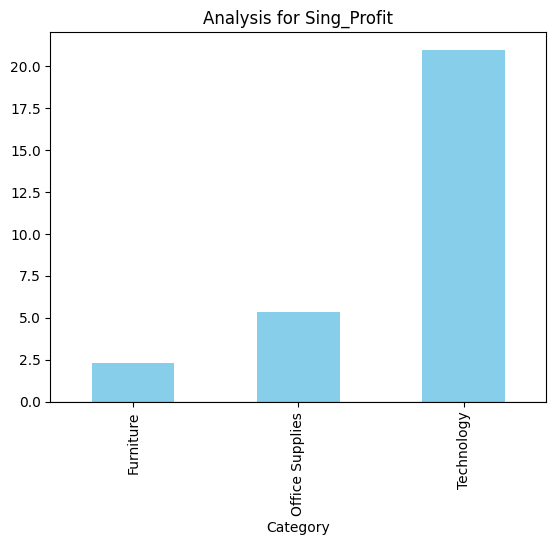

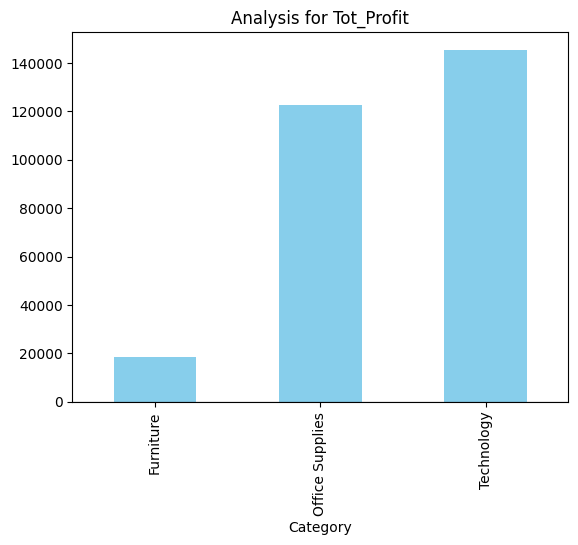

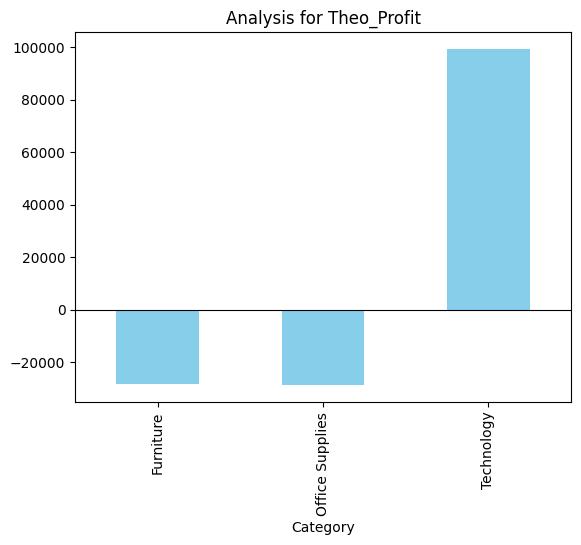

In [10]:
for col in ["Sing_Profit", "Tot_Profit", "Theo_Profit"]:
    plt.figure() # Start a new fresh graph
    cat_df[col].plot(kind='bar', color='skyblue')
    plt.title(f'Analysis for {col}')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.show()
# Make a graph for each relevant column  

In [11]:
cat_df.to_csv("C:/Users/YawOM/OneDrive/Desktop/Data Science/Cat_Profit.csv")
df.to_csv("C:/Users/YawOM/OneDrive/Desktop/Data Science/Superstore_New.csv")
# Save cat_df and df as new files